# Introduction


Welcome to this interactive tutorial on implementing a Connect 4 AI using the minimax algorithm! The goal of this notebook is to guide you through the process of understanding and applying the minimax algorithm in a real-world game setting. By the end of this tutorial, you will have a deeper understanding of how the minimax algorithm works, including its application in game strategies, and how to implement it in Python. This tutorial is designed for those who are just starting to learn about game AI and the minimax algorithm.

### Algorithm Overview

The minimax algorithm is a recursive decision-making tool used in two-player games to identify the optimal move. It involves predicting the opponent's response to each potential move. To evaluate the effectiveness of a move, we simulate the opponent's perspective, considering their possible actions in response. This creates a hypothetical tree of game states, branching out until a game-ending scenario is reached - a win, loss, or draw. At this terminal point, the recursion concludes as no further moves need consideration. This process helps in strategizing by assessing the consequences of each move in the context of the opponent's likely reactions. This algorithm can be further optimized with a technique called alpha-beta pruning, which we will explore in this tutorial.

### Connect 4 Game Rules

Connect Four is two player game involving a board with 7 columns and 6 rows. Players, each designated a color, take turns dropping their colored discs into a chosen column. The disc slides down to the bottom-most vacant spot in that column. The first player to align four discs of the same color either vertically, horizontally, or diagonally wins. If the board fills up completely without any alignment, the game ends in a draw. For more information on the game, visit [here](https://en.wikipedia.org/wiki/Connect_Four).


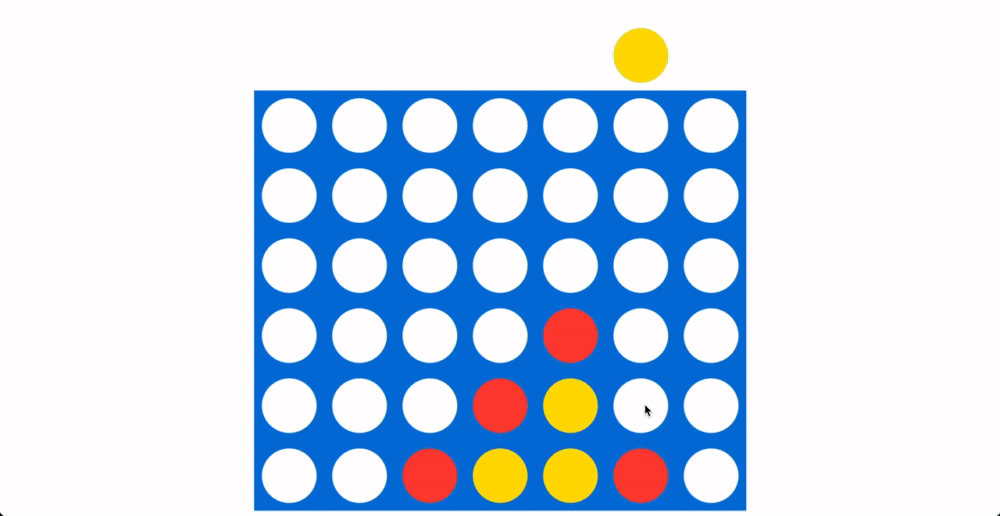



## Environment Setup

### Python Version
This tutorial is designed to work with Python 3. You do not need any specific third-party libraries, so any version of Python 3 should be sufficient to run the code. To check your Python version, you can run the following command in a code cell:

```python
!python --version


## Importing the Game Code

Our Connect 4 game logic is encapsulated in a separate Python file named `connect_four.py`. Ensure that this file is located in the same directory as your Jupyter Notebook. You can import the functions and constants from this file by running the next cell.

This import statement brings all the necessary game functions into the notebook, allowing us to interact with the game logic directly in subsequent sections.


In [1]:
from connect_four import *

## Connect 4 Implementation

### Board Representation
In our Connect 4 implementation, the board is represented as a 6-row by 7-column grid, initialized with empty spaces. The `create_board` function handles this initialization, and the `print_board` function is used for displaying the current state of the board on the console.

### Making Moves
The game logic includes functions for making moves and checking the validity of these moves. The `make_move` function places a player's piece in the chosen column, while `is_valid_move` checks if a move is legal based on the current state of the board.

### Winning Condition
Determining the winning condition is crucial in Connect 4. The `has_won` function checks for any alignment of four consecutive discs of the same color, either vertically, horizontally, or diagonally.

### Utility Functions
Additional utility functions include `generate_random_move`, which generates a random move for the AI player, `find_possible_moves`, which lists all possible moves based on the current board state, and `game_finished`, which checks whether the game has reached a conclusive state (win, loss, or draw).

### Gameplay Functions
The `play_random_game` function facilitates a complete game of Connect 4 between a player and a random move generating agent or two random move generating agents. We will write a modification of this function after implementing the minimax AI.

For a detailed view of these functions and their implementation, please refer to the `connect_four.py` file. The file contains comprehensive code and comments for each function, offering an in-depth understanding of the game mechanics.



## Connect 4 Game Simulation

Now that we have an overview of the Connect 4 implementation, let's see it in action! You can interact with the game in two ways:

1. **Play Against the Random Computer Agent**: Experience the game firsthand by playing against a computer agent that makes random moves. This will give you a feel for the game dynamics and the functionality of our implementation. To play, simply run the following command in a code cell:

    ```python
    play_random_game(is_human=True)
    ```

    In this mode, you'll be making moves as Player 1. Enter the column number where you want to drop your disc when prompted.
    

2. **Watch Two Random Agents Play**: To observe how two computer agents play against each other, both making random moves, execute this command:

    ```python
    play_random_game(is_human=False)
    ```

    This simulation will run a game between two AI players, allowing you to see a full game unfold automatically.

Feel free to run these simulations multiple times to observe different outcomes. Each game can unfold in various ways, giving you insights into possible strategies and game progressions.


In [2]:
play_random_game(is_human=True)


   1   2   3   4   5   6   7 
+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+

Please select a column to place your piece (enter -1 to terminate):
-1
Game terminated


##### Moving Beyond Random AI

As you might have observed from the game simulations, the random AI is not particularly strategic. It makes moves without considering future consequences, leading to a purely chance-based game. To enhance the AI's performance, lets implement a more intelligent decision-making process. This is where the Minimax algorithm comes into play.

## 4. The Minimax Algorithm

### Explanation
The Minimax algorithm is a popular strategy in game theory for minimizing the possible loss in a worst-case scenario (maximizing the minimum gain). It's especially effective in two-player games like Connect 4. The algorithm works by simulating all possible moves in the game, evaluating them, and choosing the best one based on these evaluations.

In Connect 4, Minimax involves building a decision tree where each node represents a possible state of the game board after a move. The algorithm explores these nodes, branching out to subsequent possible moves, creating a tree-like structure. The final layer of this tree (the leaf nodes) represents game states where either a player wins, loses, or the game ends in a draw.

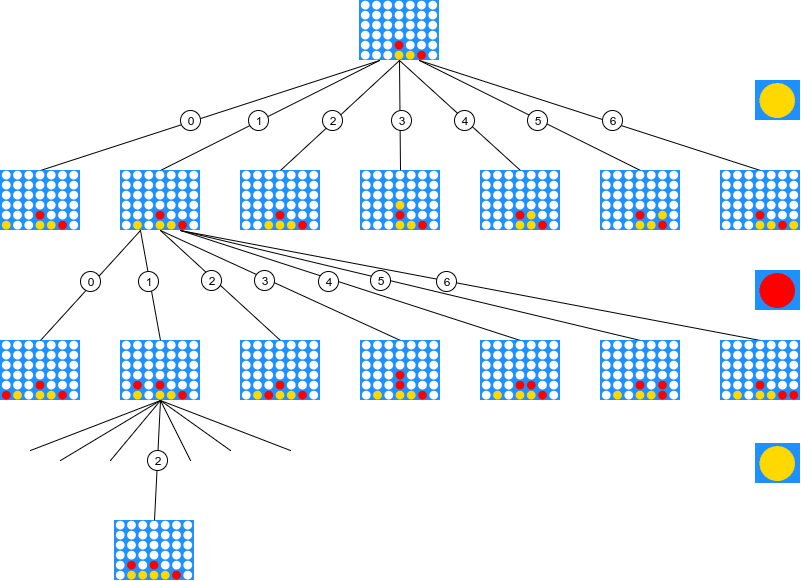

Minimax evaluates these final states and assigns scores to them (positive for wins, negative for losses, zero for draws). It then propagates these scores back up the tree, with each player trying to maximize their score – the AI aims to maximize its score while assuming the opponent is trying to minimize it. This back-and-forth continues until the algorithm reaches the current game state, at which point it can make an informed decision about the best possible move.


Let's visualize a simplified decision tree to better understand the algorithm:


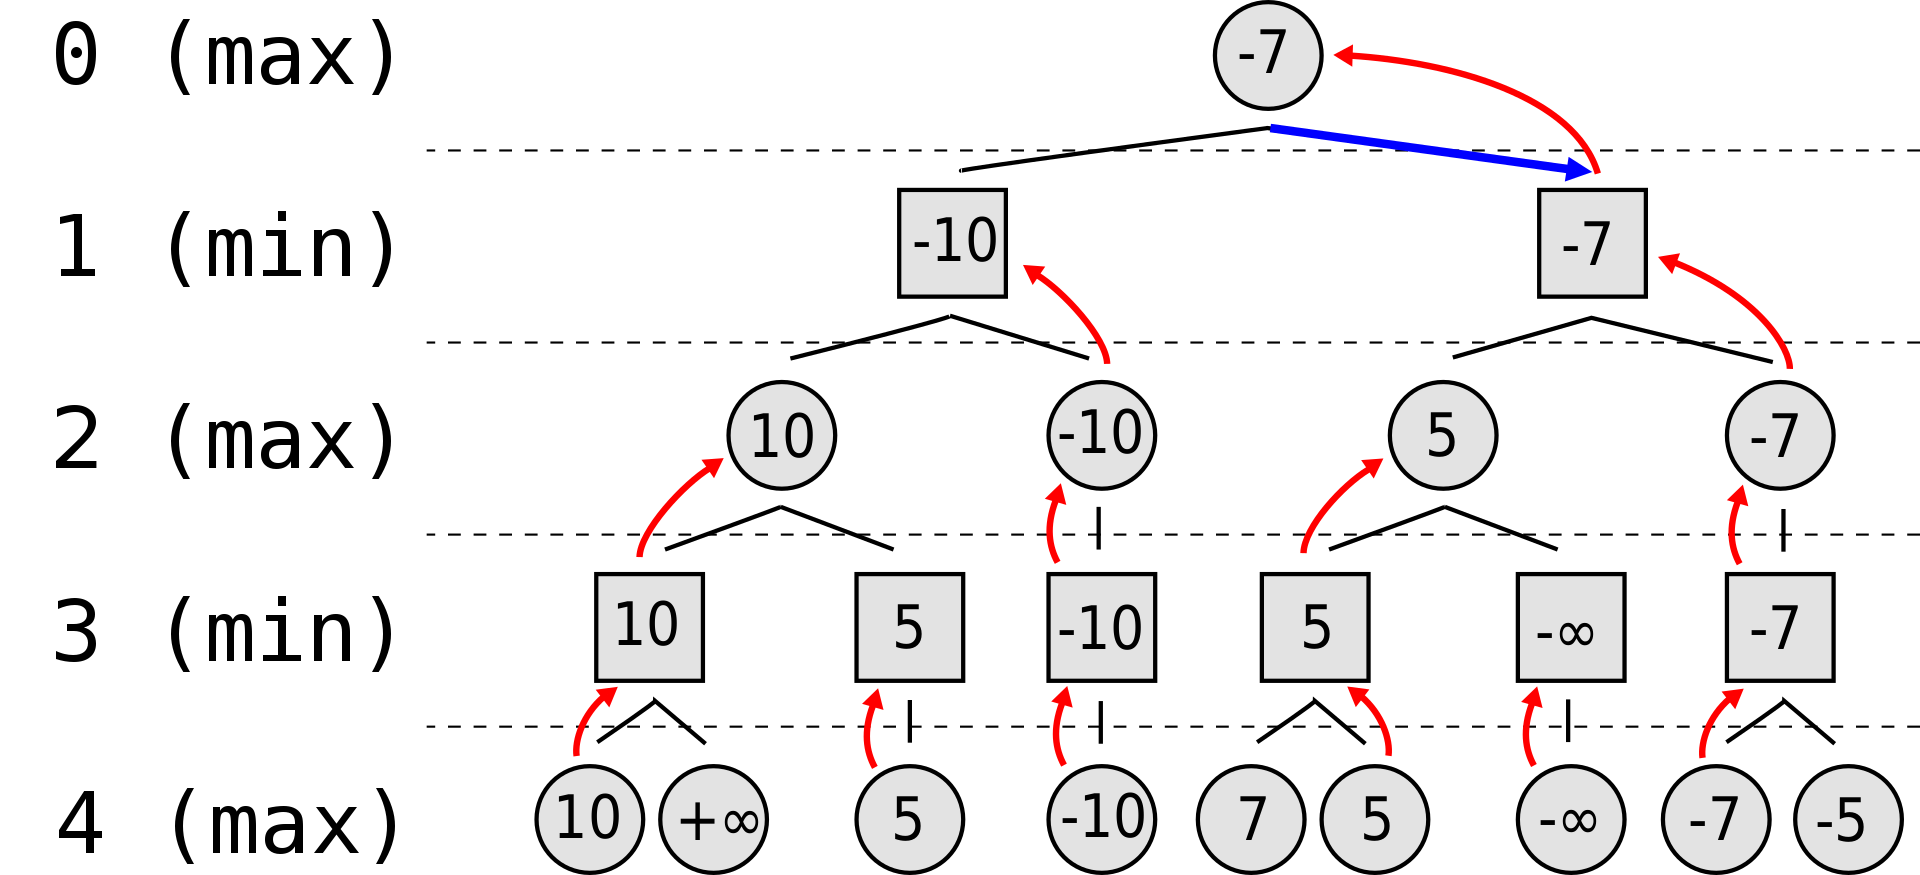


This tree structure helps the AI to "look ahead" and evaluate the consequences of its moves, leading to more strategic gameplay compared to the random AI.

In the next section, we will delve into the implementation details of the Minimax algorithm for our Connect 4 AI.


### Building the Minimax Algorithm: Step by Step

#### Introduction to the Minimax Function

Now lets start implementing our `minimax` function. The function will have two parameters:

1. **board**: This parameter represents the current state of the game board. When we first call `minimax`, this will be the actual board configuration at that moment. Our goal is to evaluate this state and find the best move for the current player.

2. **maximizing_turn (Boolean)**: The second parameter, `maximizing_turn`, tells us whose turn it is. If `maximizing_turn` is `True`, it's the maximizing player's turn, where we aim to choose the move with the highest score. If `maximizing_turn` is `False`, it's the minimizing player's turn, and we aim to pick the move with the lowest score.

#### Implementing the Base Case

The base case of our `minimax` function is crucial. It handles the situation where the game has ended. Depending on the outcome, we return a specific score:

- **Player 1 Wins**: Return `1`
- **Player 2 Wins**: Return `-1`
- **Draw**: Return `0`

These values help the algorithm make decisions by evaluating the end states of the game.



In [3]:
def minimax(board, maximizing_turn):
    """
    Basic Minimax algorithm to find the best move for the current game state.

    """
    # Base case: Check if the game is finished
    if game_finished(board):
        if has_won(board, PLAYER1):
            return 1  # Player 1 wins
        elif has_won(board, PLAYER2):
            return -1  # Player 2 wins
        else:
            return 0  # Draw

    # Implementation of recursive steps will be added in the next sections

# Example usage (this code just creates a board where player 1 wins the game to test the base case)
board = create_board()
for i in range(3):
    make_move(board,1,PLAYER1)
    make_move(board,2,PLAYER2)
make_move(board,1,PLAYER1)
print_board(board)
print("Minimax score: ",minimax(board, True))




   1   2   3   4   5   6   7 
+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+
|🔴 |   |   |   |   |   |   |
+---+---+---+---+---+---+---+
|🔴 |🔵 |   |   |   |   |   |
+---+---+---+---+---+---+---+
|🔴 |🔵 |   |   |   |   |   |
+---+---+---+---+---+---+---+
|🔴 |🔵 |   |   |   |   |   |
+---+---+---+---+---+---+---+
Minimax score:  1


A score of positive score indicates that player 1 won!

### Developing the Recursive Component of Minimax

After handling the base case for the leaf nodes, we now need to focus on the other nodes of the decision tree. These nodes are not end states of the game, so we need to consider the possible future moves.

When it's not a leaf node, we need to determine whether it's a maximizing or minimizing player's turn. The maximizing player will look for the move that yields the highest score, while the minimizing player seeks the move with the lowest score. However, since each move's outcome depends on subsequent moves, we have to recursively call `minimax` for all possible moves until we reach the leaves of the decision tree.

Let's expand our `minimax` function to include this recursive logic.


In [4]:
def minimax(board, maximizing_turn):
    """
    Minimax algorithm to determine the best move in a game of Connect 4.

    Args:
        board (list of list): The current board state.
        maximizing_turn (bool): True if it's maximizing player's turn, False otherwise.

    Returns:
        int: The score of the board.
    """

    # Base case: Check if the game is finished
    if game_finished(board):
        if has_won(board, PLAYER1):
            return 1  # Player 1 wins
        elif has_won(board, PLAYER2):
            return -1  # Player 2 wins
        else:
            return 0  # Draw 
        
    if maximizing_turn:
        best_score = -float('inf')
        cols = find_possible_moves(board)
        for col in cols:
            new_board = deepcopy(board)
            # recursively calculate the score for the next node (switch maximizing to minimizing)
            make_move(new_board, col, PLAYER1)
            new_score = minimax(new_board, False)
            if new_score > best_score:
                best_score = new_score
    
    # minimizing player turn
    else:
        best_score = float("Inf")
        cols = find_possible_moves(board)
        for col in cols:
            new_board = deepcopy(board)
            make_move(new_board, col, PLAYER2)
            # recursively calculate the score for the next node (switch minimizing to maximizing)
            new_score = minimax(new_board, True)
            if new_score < best_score:
                best_score = new_score
    
    
    return best_score



Currently, our `minimax` function returns only the score of the best possible move. For example, if the final score is 1, we can infer that Player 1 has a winning strategy from the current board state. However, this information is incomplete for practical gameplay because it doesn't tell us which move leads to this winning state. Essentially, we know that a win is possible, but we don't know how to achieve it.


### Enhancing the Minimax Function: Returning the Move and Score

#### Modifying the Function to Return the Move

To make our `minimax` function more useful, we need to modify it to return not just the score, but also the move that leads to that score. This enhancement will give us complete information: not only can we evaluate the best possible outcome (win, lose, or draw), but we can also determine the specific move that should be made next.

#### Implementation Approach

We'll adjust the function to keep track of the best move at each stage of the recursion. When exploring all possible moves, we'll record which move leads to the best score for the current player. Then, along with the score, we'll return this move up the call stack. This way, when the recursion unwinds back to the initial call, we'll have both the optimal score and the corresponding move that leads to it.

This approach allows our AI to not only evaluate the game state but also make informed decisions about which column to choose for the next piece. In the next code cell, we'll implement these changes to our `minimax` function.


In [ ]:
def minimax(board, maximizing_turn):
    """
    Minimax algorithm to determine the best move in a game of Connect 4.

    Args:
        board (list of list): The current board state.
        maximizing_turn (bool): True if it's maximizing player's turn, False otherwise.

    Returns:
        tuple: Best move and its score.
    """

    if game_finished(board):
        if has_won(board, PLAYER1):
            return (None, 1)  
        elif has_won(board, PLAYER2):
            return (None, -1) 
        else:
            return (None, 0)

    if maximizing_turn:
        best_score = -float('inf')
        best_move = None
        for col in find_possible_moves(board):
            new_board = deepcopy(board)
            make_move(new_board, col, PLAYER1)
            score = minimax(new_board, False)[1]
            if score > best_score:
                best_score = score
                best_move = col
        return (best_move, best_score)
    
    else:
        best_score = float('inf')
        best_move = None
        for col in find_possible_moves(board):
            new_board = deepcopy(board)
            make_move(new_board, col, PLAYER2)
            score = minimax(new_board, True)[1]
            if score < best_score:
                best_score = score
                best_move = col
        return (best_move, best_score)


### Testing the Minimax Algorithm with an Example

#### Setting Up a Game Scenario

To understand how our `minimax` function performs in a real game scenario, let's set up a board with a few moves already played and then use the `minimax` function to determine the best next move for Player 1. Here's the code to create this scenario:

Disclaimer: the cell will not finish running so you will have to terminate it

In [ ]:
board = create_board()
for i in range(3):
    make_move(board,3,PLAYER1)
    make_move(board,2,PLAYER2)

print_board(board)
print("next best move for player 1 is column:" ,minimax(board, True)[0])


When you run the above code in a Jupyter Notebook cell, you might notice that the cell continues to execute for a long time. This occurs because our `minimax` algorithm is exhaustively examining every possible future move to select the most advantageous one for the current player.

### Why Is the Execution Time Long?

Connect 4 offers 7 columns for each move, leading to a multitude of possible board configurations—precisely, around 4,531,985,219,092 ways to fill out the board! As a result, our `minimax` function, which tries to evaluate each potential future game state, can end up consuming a considerable amount of time to complete its execution.

### What is the solution?

To address this issue and enhance the algorithm's efficiency, we can introduce a depth limitation. By limiting the recursive depth to which the `minimax` function explores the game tree, we can significantly reduce the number of calculations, thereby speeding up the decision-making process. This approach allows the algorithm to provide a practical move suggestion without needing to evaluate every possible game outcome down to the end of the game. The following code cell modifies the `minimax` function to incorporate this depth parameter, making it a more effective tool for game strategy analysis.


In [ ]:
def minimax(board, maximizing_turn, depth):
    """
    Minimax algorithm with depth limitation to determine the best move in a game of Connect 4.

    Args:
        board (list of list): The current board state.
        maximizing_turn (bool): True if it's maximizing player's turn, False otherwise.
        depth (int): The current depth of recursion.

    Returns:
        tuple: Best move and its score.
    """

    if depth == 0 or game_finished(board):
        if has_won(board, PLAYER1):
            return (None, 1)  
        elif has_won(board, PLAYER2):
            return (None, -1) 
        else:
            return (None, 0)  # Draw or depth limit reached

    if maximizing_turn:
        best_score = -float('inf')
        best_move = None
        for col in find_possible_moves(board):
            new_board = deepcopy(board)
            make_move(new_board, col, PLAYER1)
            _, score = minimax(new_board, False, depth - 1)
            if score > best_score:
                best_score = score
                best_move = col
        return (best_move, best_score)
    
    else:
        best_score = float('inf')
        best_move = None
        for col in find_possible_moves(board):
            new_board = deepcopy(board)
            make_move(new_board, col, PLAYER2)
            _, score = minimax(new_board, True, depth - 1)
            if score < best_score:
                best_score = score
                best_move = col
        return (best_move, best_score)


#### Testing the Minimax Algorithm with Depth Limitation

Now that we have enhanced our minimax function with the concept of depth limitation, let's put it to the test again. This time, we'll execute the minimax function with a depth limit set to 3. By doing so, the algorithm will only explore the next three layers of the decision tree.

Run the next cell to see the output.

In [ ]:
board = create_board()
for i in range(3):
    make_move(board,3,PLAYER1)
    make_move(board,2,PLAYER2)

print_board(board)
print("next best move for player 1 is column:" ,minimax(board, True, 3)[0])


Limiting the depth to 3 layers significantly reduced the runtime of the function by avoiding an exhaustive exploration of all possible future game states. Feel free to change the third parameter in `minimax(board, True, 3)` to a different number to observe the runtime difference.

Hint: the bigger the depth, the more layers and nodes the function explores

**Speed Improvement with Depth Limitation:** Adding a depth parameter has sped up our `minimax` function. However,  there is an issue in our current implementation. We only evaluate the states if they are terminating. What if the depth is too shallow to reach a terminal state?

### Improving Minimax with an Evaluation Function

We need an improved evaluation function to find hints if the AI is doing well in non-terminal states. One way of doing this is by counting the number of streaks we have in 4 consecutive spots.

Lets create an evaluation function `horizontal_evaluation` that will:
- Count horizontal streaks of 2 and 3 pieces within a 4-space window for both players.
- Return the score difference based on these streaks.
- Assign a high positive value (like positive infinity) if Player 1 is winning, and a large negative value (like negative infinity) if Player 2 is winning.

This approach does not seem the most optimal but appears to be a good step in making the AI smarter!


In [ ]:
# Helper function to calculate the score within a window of size 4
def calculate_window_score(window,piece):
    
    score = 0
    count = window.count(piece)
    blank = window.count(" ")
    if count == 3 and blank == 1:
        score += 3
    elif count == 2 and blank == 2:
        score += 2

    return score

# Helper function to alculate the total horizontal score for a particular piece in the entire grid
def calculate_horizontal_score(board, piece):
    score = 0

    for row in range(ROWS):
        for col in range(COLUMNS - 3):
            window = board[row][col:col + 4]
            score += calculate_window_score(window, piece)
    
    return score

# Evaluation function based on the approach mentioned above
def horizontal_evaluation(board):
    if has_won(board, PLAYER1):
        return float("Inf")
    elif has_won(board,PLAYER2):
        return -float("Inf")
    
    player1_score = calculate_horizontal_score(board,PLAYER1)
    player2_score = calculate_horizontal_score(board,PLAYER2)

    return player1_score - player2_score

In [ ]:
board = create_board()

make_move(board,3,PLAYER1)
make_move(board,2,PLAYER1)
make_move(board,1,PLAYER1)
print_board(board)
print("Board evaluation score is: ",horizontal_evaluation(board))

Observe that the score that we get is 5 and not 3. This is because there is a 2 streak hidden within the 3 row streak.

#### Modifying the Minimax function

Now lets modify our minimax function to use this evaluation function by passing it as an argument and use it to evaluate the board

In [ ]:
def minimax(board, maximizing_turn, depth, evaluation_function):
    """
    Minimax algorithm to determine the best move in a game of Connect 4.

    Args:
        board (list of list): The current board state.
        maximizing_turn (bool): True if it's maximizing player's turn, False otherwise.
        depth (int): The current depth of recursion.
        evaluation_function (function): The heuristic function to evaluate board states.

    Returns:
        tuple: Best move and its score.
    """

    if depth == 0 or game_finished(board):
        return [None, evaluation_function(board)]
    
    if maximizing_turn:
        best_score = -float("Inf")
        cols = find_possible_moves(board)

        best_move = random.choice(cols)
        for col in cols:
            new_board = deepcopy(board)
            make_move(new_board, col, PLAYER1)
            new_score = minimax(new_board, False, depth - 1, evaluation_function)[1]
            if new_score > best_score:
                best_score = new_score
                best_move = col

    else:
        best_score = float("Inf")
        cols = find_possible_moves(board)
        best_move = random.choice(cols)
        for col in cols:
            new_board = deepcopy(board)
            make_move(new_board, col, PLAYER2)
            new_score = minimax(new_board, True, depth - 1, evaluation_function)[1]
            if new_score < best_score:
                best_score = new_score
                best_move = col

    return [best_move,best_score]

 ### Testing our evaluation function
With our enhanced minimax function now in place, it's time to put it to a test against a random evaluation function that generates a number between 100 and -100. Before that we will write the function, `play_game`, to run simulations between two Minimax AI players set at different depths. By passing in our evaluation function along with specified depths as arguments, we can observe and analyze the outcomes of these AI vs. AI matches.


In [ ]:
def play_game(player1 = HUMAN,depth1 = 4, eval_func1 = random_eval,depth2 = 4, eval_func2 = random_eval):
    """
    Play a game of Connect 4.

    Args:
        player1 (int): The type of the first player (HUMAN or AI).
        depth1 (int): The depth of recursion for player1 if AI.
        depth2 (int): The depth of recursion for player2.
        eval_func1 (function): The heuristic function for player1 if AI.
        eval_func2 (function): The heuristic function for player2.
    """
    board = create_board()
    print_board(board)
    print()
    while not game_finished(board):
      if player1 == HUMAN:
          move = get_human_player_move(board)
      else:
        print( "AI 1 turn")
        move, score = minimax(board, True, depth1, eval_func1)
      print( "Selected: ", move)
      make_move(board, move, PLAYER1)
      print_board(board)
      print()

      if not game_finished(board):

        result = minimax(board, False, depth2, eval_func2)
        print("AI 2 turn")
        print( "Selected:", result[0])
        make_move(board, result[0], PLAYER2)
        print_board(board)
        print()
    if has_won(board, PLAYER1):
        print("Player 1 won!")
    elif has_won(board, PLAYER2):
        print("Player 2 won!")
    else:
        print("Game is tied!")

#### Random evaluation vs Horizontal Evaluation

In [ ]:
# AI 1 uses random_eval function from connect_four.py and AI 2 uses our horizontal_evaluation function
play_game(player1 = AI,depth1 = 4, eval_func1 = random_eval,depth2 = 4, eval_func2 = horizontal_evaluation)

As expected with our new evaluation function we were able to defeat the random AI. Now lets experiment more with our evaluation function but this time with different depths!

### Simulating Games Between Minimax AIs of Different Depths
By passing in our evaluation function along with specified depths as arguments, we can observe and analyze the outcomes of these AI vs. AI matches.

Run the following cells and observe the outcomes. Feel free to modify the depths but it is recommended to not go over 6 because the algorithm will take a long time to run (we will explore how to improve on this below!)


In [ ]:
# AI 1 has depth 1 and AI 2 has depth 4
play_game(player1 = AI,depth1 = 1, eval_func1 = horizontal_evaluation,depth2 = 4, eval_func2 = horizontal_evaluation)

In [ ]:
# AI 1 has depth 2 and AI 2 has depth 4
play_game(player1 = AI,depth1 = 2, eval_func1 = horizontal_evaluation,depth2 = 4, eval_func2 = horizontal_evaluation)

In [ ]:
# AI 1 has depth 5 and AI 2 has depth 3
play_game(player1 = AI,depth1 = 5, eval_func1 = horizontal_evaluation,depth2 = 3, eval_func2 = horizontal_evaluation)

In [ ]:
# AI 1 has depth 6 and AI 2 has depth 4
play_game(player1 = AI,depth1 = 6, eval_func1 = horizontal_evaluation,depth2 = 4, eval_func2 = horizontal_evaluation)



It is evident that increasing the depth in our minimax function enhances the AI's performance, making it more strategic. However, a deeper search depth also leads to slower execution times. Ideally, we'd like to explore deeper levels of the game tree without a substantial increase in runtime. This is where alpha-beta pruning comes into play.

### Enhancing AI Efficiency with Alpha-Beta Pruning

#### Introduction to Alpha-Beta Pruning
Alpha-beta pruning is a technique used to enhance the efficiency of the minimax algorithm. It works by eliminating unnecessary parts of the search tree, cutting off branches that won't yield better results compared to already explored paths. This process involves two additional parameters in the minimax function: alpha and beta.

    - Alpha: Represents the best value the maximizer can guarantee at the current level or higher.
    - Beta: Indicates the best value the minimizer can ensure at the current level or lower.

#### Implementing Alpha-Beta Pruning
To integrate alpha-beta pruning in our minimax function, we introduce alpha and beta as new parameters, initializing alpha to negative infinity and beta to positive infinity. These values are then passed down recursively.

During the recursion, we adjust alpha and beta based on the outcomes:

In the maximizing scenario, we update alpha if we find a value greater than the current alpha.
In the minimizing case, beta is updated if we discover a value less than the current beta.
Crucially, we implement a pruning condition: if alpha is greater than or equal to beta, the search in this branch is discontinued, optimizing our search process. This approach allows us to explore deeper levels more efficiently, enhancing the AI's decision-making capabilities without the cost of excessive runtime.

In [ ]:
def minimax(board, maximizing_turn, depth, alpha, beta, evaluation_function):
    """
    Minimax algorithm to determine the best move in a game of Connect 4.

    Args:
        board (list of list): The current board state.
        maximizing_turn (bool): True if it's maximizing player's turn, False otherwise.
        depth (int): The current depth of recursion.
        alpha (float): The alpha value for alpha-beta pruning.
        beta (float): The beta value for alpha-beta pruning.
        evaluation_function (function): The heuristic function to evaluate board states.

    Returns:
        tuple: Best move and its score.
    """

    if depth == 0 or game_finished(board):
        return [None, evaluation_function(board)]
    
    if maximizing_turn:
        best_score = -float("Inf")
        cols = find_possible_moves(board)

        best_move = random.choice(cols)
        for col in cols:
            new_board = deepcopy(board)
            make_move(new_board, col, PLAYER1)
            new_score = minimax(new_board, False, depth - 1, alpha, beta, evaluation_function)[1]
            if new_score > best_score:
                best_score = new_score
                best_move = col
            alpha = max(alpha, best_score)
            if alpha >= beta:
                break
    else:
        best_score = float("Inf")
        cols = find_possible_moves(board)
        best_move = random.choice(cols)
        for col in cols:
            new_board = deepcopy(board)
            make_move(new_board, col, PLAYER2)
            new_score = minimax(new_board, True, depth - 1, alpha, beta, evaluation_function)[1]
            if new_score < best_score:
                best_score = new_score
                best_move = col
            beta = min(beta, best_score)
            if alpha >= beta:
                break
    return [best_move,best_score]

Now lets update our implementation of `play_game` function with the updated minimax function call

In [ ]:
def play_game(player1 = HUMAN,depth1 = 4, eval_func1 = random_eval,depth2 = 4, eval_func2 = random_eval):
    """
    Play a game of Connect 4.

    Args:
        player1 (int): The type of the first player (HUMAN or AI).
        depth1 (int): The depth of recursion for player1 if AI.
        depth2 (int): The depth of recursion for player2.
        eval_func1 (function): The heuristic function for player1 if AI.
        eval_func2 (function): The heuristic function for player2.
    """
    board = create_board()
    print_board(board)
    print()
    while not game_finished(board):
      if player1 == HUMAN:
          move = get_human_player_move(board)
      else:
        print( "AI 1 turn")
        move, score = minimax(board, True, depth1, -float("Inf"), float("Inf"), eval_func1)
      print( "Selected: ", move)
      make_move(board, move, PLAYER1)
      print_board(board)
      print()

      if not game_finished(board):

        result = minimax(board, False, depth2, -float("Inf"), float("Inf"), eval_func2)
        print("AI 2 turn")
        print( "Selected:", result[0])
        make_move(board, result[0], PLAYER2)
        print_board(board)
        print()
    if has_won(board, PLAYER1):
        print("Player 1 won!")
    elif has_won(board, PLAYER2):
        print("Player 2 won!")
    else:
        print("Game is tied!")

Now run the next cell to see the difference in runtime with the alpha-beta pruning

In [ ]:
# AI 1 has depth 6 and AI 2 has depth 4
play_game(player1 = AI,depth1 = 6, eval_func1 = horizontal_evaluation,depth2 = 4, eval_func2 = horizontal_evaluation)

This time the algorithm runs significantly faster

Since we have explored optimizing the runtime of algorithm, lets now try to improve the smartness of the AI.

### New Evaluation Strategy

While our current evaluation function assesses horizontal streaks, a better evaluation can include streaks in all possible directions — horizontal, vertical, and both diagonals.

#### Broadening the Scope of Evaluation

Lets write the enhanced evaluation function 'optimized_evaluation' by considering the following:

- **Horizontal Streaks**: Assessing sequences of pieces along the rows.
- **Vertical Streaks**: Evaluating potential streaks in the columns.
- **Diagonal Streaks**: Both from top-left to bottom-right and top-right to bottom-left.

This comprehensive approach ensures that our AI can recognize and respond to potential opportunities and threats in every possible direction, making its gameplay significantly more strategic and formidable.


In [ ]:
def calculate_total_streak_score(board, piece):
    score = 0
    
    # Vertical
    for col in range(COLUMNS):
        for row in range(ROWS - 3):
            window = [board[row + i][col] for i in range(4)]
            score += calculate_window_score(window, piece)

    # Horizontal
    for row in range(ROWS):
        for col in range(COLUMNS - 3):
            window = board[row][col:col + 4]
            score += calculate_window_score(window, piece)

    
    # Negative slope diagonal
    for col in range(COLUMNS - 3):
        for row in range(ROWS - 3):
            window = [board[row + i][col + i] for i in range(4)]
            score += calculate_window_score(window, piece)

    # Positive slope diagonal
    for col in range(COLUMNS - 3):
        for row in range(3, ROWS):
            window = [board[row - i][col + i] for i in range(4)]
            score += calculate_window_score(window, piece)

    return score


def optimized_evaluation(board):
    if has_won(board, PLAYER1):
        return float("Inf")
    elif has_won(board,PLAYER2):
        return -float("Inf")
    
    player1_score = calculate_total_streak_score(board,PLAYER1)
    player2_score = calculate_total_streak_score(board,PLAYER2)

    return player1_score - player2_score

### Testing the New Evaluation Function Against the Previous Version

Now that we have developed a more comprehensive evaluation function, it's time to put it to the test. We will compare the performance of our new function, which evaluates horizontal, vertical, and diagonal streaks, against the previous version that focused only on horizontal streaks.

#### Setting Up the Comparison Test

In this test, we'll pit the AI with the new evaluation function against the AI using the previous, more limited evaluation function. This will allow us to observe:

- **Strategic Depth**: How the new evaluation function influences the AI's decision-making and overall strategy.
- **Performance Improvement**: Whether the new function leads to more effective gameplay compared to the previous one.

By conducting this comparative test, we can gauge the effectiveness of our enhancements and understand the impact of a more holistic board evaluation approach in Connect 4 gameplay. Feel free to modify the depths and evaluation functions to see different results!


In [ ]:
#AI 1 uses horizontal_evaluation and AI 2 uses optimized_evaluation
play_game(player1 = AI,depth1 = 5, eval_func1 = horizontal_evaluation,depth2 = 5, eval_func2 = optimized_evaluation)

### Conclusion: Reflecting on Our Enhanced Connect 4 AI
We have successfully refined and tested our evaluation function, resulting in an AI that performs impressively well. The comprehensive approach of assessing horizontal, vertical, and diagonal streaks has evidently improved the AI's strategic gameplay.

### Challenge Yourself Against the AI
Are you ready to put your skills to the test? Challenge yourself by playing a match against this AI. Run the following command to see how you fare against our optimized AI.

### Exploring Further Improvements
Feel free to experiment and further enhance the evaluation function. The journey of AI development in games like Connect 4 is continuous, and there's always room for innovation and improvement.

### Wrapping Up the Tutorial
This tutorial journey has taken us through the development of a basic minimax function, the introduction of depth limitation and alpha-beta pruning for efficiency, and the creation of a sophisticated evaluation function. We've seen how each of these components plays a crucial role in building a competent and strategic AI for Connect 4.


In [ ]:
play_game(player1 = HUMAN, depth2 = 6, eval_func2 = optimized_evaluation)